

# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

#### Data Dictionary
**PatientId:**
Identification of a patient.  
**AppointmentID:**
Identification of each appointment.  
**Gender:**
Male or Female .    
**ScheduledDay:**
The day someone called or registered the appointment, this is before appointment of course.  
**AppointmentDay:**
The day of the actuall appointment, when they have to visit the doctor.  
**Age:**
How old is the patient.  
**Neighbourhood:**
Where the appointment takes place.  
**Scholarship:** 
True of False . Observation, this is a broad topic, consider reading this article.  
**Hipertension:**
True or False.    
**Diabetes:**
True or False.      
**Alcoholism:**
True or False.  
**Handcap:**
True or False.         
**SMS_received:**
1 or more messages sent to the patient.  
**No-show:**
True or False.  

### Questions:
###### *1/ What are the average of number show up and no show for each location ?*
###### *2/ What is the percentage of handcap they show up and no show  ?*
###### *3/ What is average of those people receive sms and show up and no show ?*


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load my data and print out a few lines.
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline
df=pd.read_csv('C:/Users/Lenovo/Desktop/jupyter practes/project2_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No



### Data Cleaning (Replace this with more specific notes!)

In [284]:
# check for miss value
df.info()
# no miss value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# check for duplicated
sum(df.duplicated())
# no duplicated

0

In [6]:
# convert ScheduledDay and AppointmentDay to datetime
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [98]:
df.head(60)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What are the average of number show up and no show for each location ?)

In [172]:
# get information about patient whose show up 
show_up=df[df['No-show']=='No']
# get information about patient whose no show  
no_show=df[df['No-show']=='Yes']
# count number of patient whose show up for each location
show_up_location=show_up.groupby(['Neighbourhood'],as_index=True)['PatientId'].count()
# count number of patient whose no show for each location
no_show_location=no_show.groupby(['Neighbourhood'])['PatientId'].count()


In [9]:
# calculate avg of patient whose show up for each location
avg_show_up=[]
for x,y in enumerate(show_up_location):
    avg_show_up.insert(x,(y/len(show_up_location)))


In [10]:
# to extract unique values and save it into list for show up 
zz=pd.Series({c: df[c].unique() for c in df})
len(zz['Neighbourhood'])

81

In [11]:
# to mearge name of location with it value in dictionary for show up
dic_show_up={}
for x,y in zip(zz['Neighbourhood'],range(len(avg_show_up))):
    dic_show_up[x]=avg_show_up[y]
dic_show_up

{'JARDIM DA PENHA': 0.0875,
 'MATA DA PRAIA': 21.7625,
 'PONTAL DE CAMBURI': 2.7625,
 'REPÚBLICA': 2.75,
 'GOIABEIRAS': 4.15,
 'ANDORINHAS': 19.0375,
 'CONQUISTA': 8.3125,
 'NOVA PALESTINA': 3.175,
 'DA PENHA': 27.7875,
 'TABUAZEIRO': 24.675,
 'BENTO FERREIRA': 32.8875,
 'SÃO PEDRO': 3.175,
 'SANTA MARTHA': 8.6125,
 'SÃO CRISTÓVÃO': 14.2375,
 'MARUÍPE': 13.675,
 'GRANDE VITÓRIA': 22.35,
 'SÃO BENEDITO': 3.225,
 'ILHA DAS CAIEIRAS': 5.9,
 'SANTO ANDRÉ': 4.0125,
 'SOLON BORGES': 8.8625,
 'BONFIM': 2.2875,
 'JARDIM CAMBURI': 5.4,
 'MARIA ORTIZ': 6.6625,
 'JABOUR': 19.2875,
 'ANTÔNIO HONÓRIO': 2.625,
 'RESISTÊNCIA': 7.0375,
 'ILHA DE SANTA MARIA': 10.675,
 'JUCUTUQUARA': 19.525,
 'MONTE BELO': 1.6625,
 'MÁRIO CYPRESTE': 10.45,
 'SANTO ANTÔNIO': 19.05,
 'BELA VISTA': 0.4,
 'PRAIA DO SUÁ': 0.1,
 'SANTA HELENA': 21.675,
 'ITARARÉ': 10.6875,
 'INHANGUETÁ': 32.3875,
 'UNIVERSITÁRIO': 25.725,
 'SÃO JOSÉ': 78.15,
 'REDENÇÃO': 40.575,
 'SANTA CLARA': 26.9625,
 'CENTRO': 14.6125,
 'PARQUE MOSCOSO':

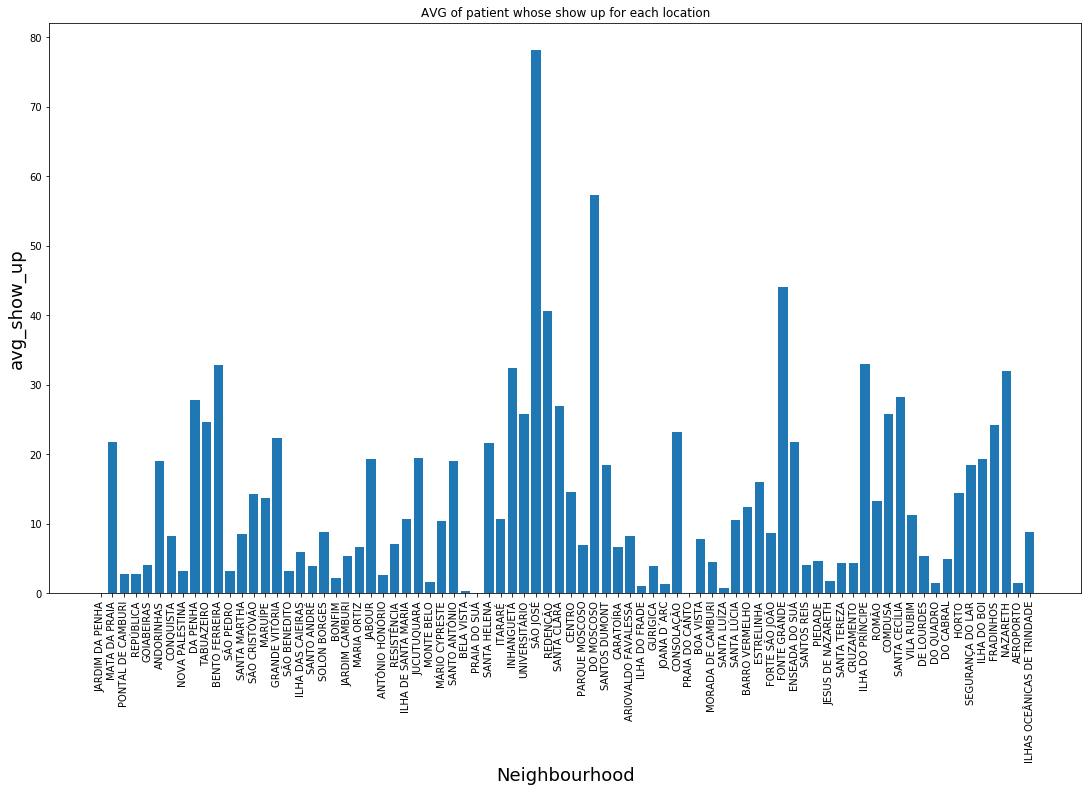

In [294]:
plt.xlabel('Neighbourhood' , fontsize=18 )
plt.ylabel('avg_show_up' , fontsize=18 )
plt.bar(range(len(dic_show_up)), list(dic_show_up.values()), align='center');
plt.xticks(range(len(dic_show_up)), list(dic_show_up.keys()),rotation=90);
plt.title('AVG of patient whose show up for each location');
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [38]:
# calculate avg of patient whose show up for each location
avg_no_show=[]
for x,y in enumerate(no_show_location):
    avg_no_show.insert(x,(y/len(no_show_location)))
len(avg_no_show)

80

In [39]:
# to extract unique values and save it into list for no show
zzz=pd.Series({c: df[c].unique() for c in df})
len(zzz['Neighbourhood'])

81

In [40]:
# to mearge name of location with it value in dictionary for no show 
dic_no_show={}
for x,y in zip(zz['Neighbourhood'],range(len(avg_no_show))):
    dic_no_show[x]=avg_no_show[y]
len(dic_no_show)

80

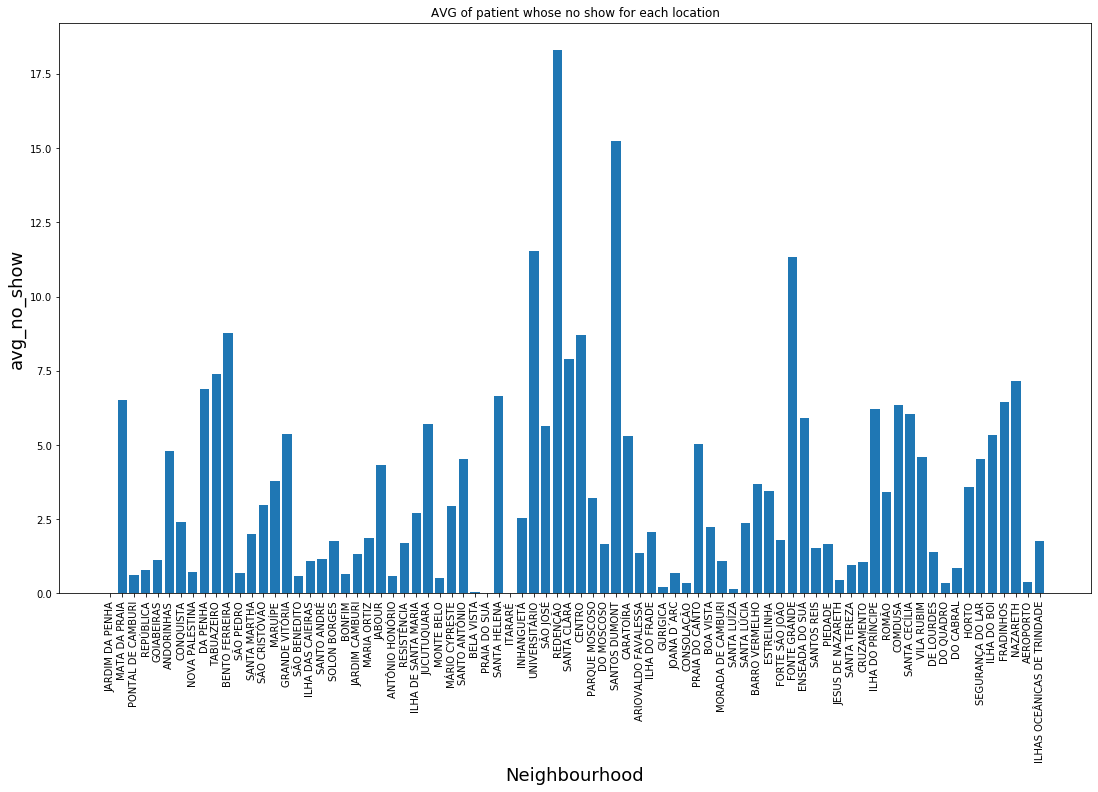

In [293]:
plt.xlabel('Neighbourhood' , fontsize=18 )
plt.ylabel('avg_no_show' , fontsize=18 )
plt.bar(range(len(dic_no_show)), list(dic_no_show.values()), align='center');
plt.xticks(range(len(dic_no_show)), list(dic_no_show.keys()),rotation=90);
plt.title('AVG of patient whose no show for each location');
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)




In [43]:
max(dic_show_up, key=dic_show_up.get), max(dic_no_show, key=dic_no_show.get)

('SÃO JOSÉ', 'REDENÇÃO')

### Findings  

As we noted in graphs, The highset patients whose no show are from "**REDENÇÃO**".  
And the highset patients whose show up are from **"SÃO JOSÉ"**.  

### Research Question 2  ( What is the percentage of handcap they show up and no show ?)

In [316]:
# calculate number of patient whose have handcap and show up
per_handcap_show_up=df.groupby('No-show')['Handcap'].count()[0]
per_handcap_show_up

88208

In [306]:
# calculate number of patient whose have handcap and no show 
per_handcap_no_show=df.groupby('No-show')['Handcap'].count()[1]
per_handcap_no_show

22319

In [308]:
df.groupby('No-show')['Handcap'].count()
df.groupby('No-show')['Handcap'].count()[1]+df.groupby('No-show')['Handcap'].count()[0]

110527

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


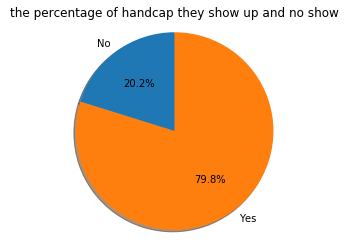

In [314]:
labels = 'No', 'Yes'
sizes = [[(per_handcap_no_show/110527)*100,(per_handcap_show_up/110527)*100]]
explode = (0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('the percentage of handcap they show up and no show')
plt.show()


### Findings  


As we noted, **79.8%** of handcap show up.  
And **20.2%** not show.

### Research Question 3  ( What are the average of those people receive sms and show up and no show ?)

In [321]:
# calculate avg of patient whose receive sms and show up
avg_rec_show_up=df.groupby('No-show')['SMS_received'].mean()[0]
avg_rec_show_up

0.2913341193542536

In [206]:
# calculate avg of patient whose receive sms and no show 
avg_rec_no_show=df.groupby('No-show')['SMS_received'].mean()[1]
avg_rec_no_show

0.43837089475334917

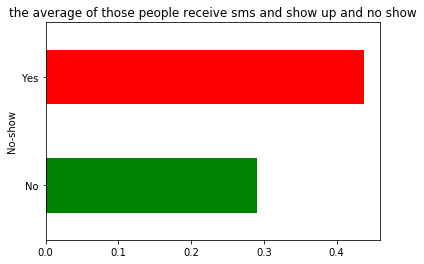

In [322]:
df.groupby('No-show')['SMS_received'].mean().plot(kind='barh',color=['green','red'],title='the average of those people receive sms and show up and no show');


### Findings  

As we noted in graphs,The highest percentage was for patients whose no show

<a id='conclusions'></a>
## Conclusions :

In my analysis I tried to figure the main reason for patients less attendance, and I discovered that location was effective.  
As we noted in graphs, The highset patients whose no show are from "**REDENÇÃO**".
And the highset patients whose show up are from **"SÃO JOSÉ"**.  
And the second reason are those people who have handicap, and as we noted, **79.8%** of handicap show up. And **20.2%** not show.  
Finally, I discovered that receive SMS does not affect as we noted in graphs,The highest percentage was for patients whose no show and receive SMS.  

###  Limitations :
This analysis is limited only on the place of the data was gathered, any trends or finds cannot be the result of we have bigger data dor the world.This analysis is shown tends and finds.